In [1]:
your_path = "/content/"
try:
    from google.colab import drive
    drive.mount('/content/drive')
    import os
    os.chdir(your_path)
    print(os.getcwd())
except ModuleNotFoundError:
    print("you are not in google colab, pass this phase")
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

Mounted at /content/drive
/content


In [2]:
!wget https://img.sportalkorea.com/service_img/2023/SK007_20230102_362201.jpg -O goat.jpg

--2023-01-27 05:34:13--  https://img.sportalkorea.com/service_img/2023/SK007_20230102_362201.jpg
Resolving img.sportalkorea.com (img.sportalkorea.com)... 175.126.41.38
Connecting to img.sportalkorea.com (img.sportalkorea.com)|175.126.41.38|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 341147 (333K) [image/jpeg]
Saving to: ‘goat.jpg’

goat.jpg            100%[===================>] 333.15K   159KB/s    in 2.1s    

2023-01-27 05:34:18 (159 KB/s) - ‘goat.jpg’ saved [341147/341147]



In [4]:
import matplotlib.pyplot as plt
from PIL import Image

img = Image.open("./goat.jpg")

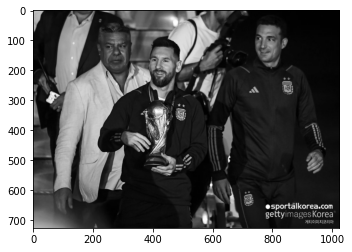

In [5]:
gray_img=img.convert("LA")
plt.imshow(gray_img)
plt.show()

# Y` = 0.2989R + 0.5870 G + 0.01140 B

In [9]:
# 이미지 크기 조회 : (width, height)
print(f"size of image (width, height = {img.size}")
print(f"type : {type(img)}")


size of image (width, height = (1024, 727)
type : <class 'PIL.JpegImagePlugin.JpegImageFile'>


 이미지의 사이즈 (width, height) = (720, 480)


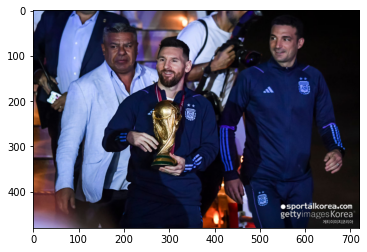

In [6]:
resized_img = img.resize((720,480))

print(f" 이미지의 사이즈 (width, height) = {resized_img.size}")

plt.imshow(resized_img)
plt.show()

In [ ]:
# 그래프의 range 가 줄어들었다!

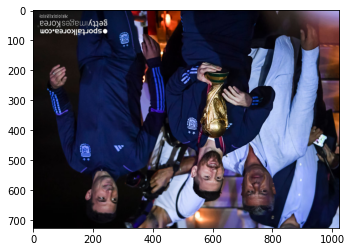

In [7]:
rotated_img = img.rotate(180)

plt.imshow(rotated_img)
plt.show()

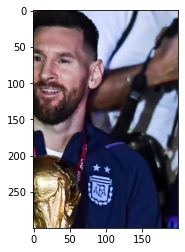

In [8]:
# Left (width, height), Right(width,height)
cropped_img = img.crop((400,100,600,400))
plt.imshow(cropped_img)
plt.show() # 이렇게 특정 그림만 잘라낼 수 있다.

In [ ]:
# figsize = 그림판의 크기

In [10]:
import torch
import numpy as np

img_array = np.array(img)

print(" --- original image size ---")
print(f"size of image (height, width, channel) = {img_array.shape}")
print(" --- after reshape, image size ---")

# reshape: H, W, C --> C, H, W permute유사
transposed_img_array = img_array.transpose(2, 0, 1)
print(f"size of image (channel, height, width) = {transposed_img_array.shape}")

 --- original image size ---
size of image (height, width, channel) = (727, 1024, 3)
 --- after reshape, image size ---
size of image (channel, height, width) = (3, 727, 1024)


In [11]:
img_torch = torch.tensor(img_array)
img_torch.size()

torch.Size([727, 1024, 3])

In [12]:
img_array.shape

(727, 1024, 3)

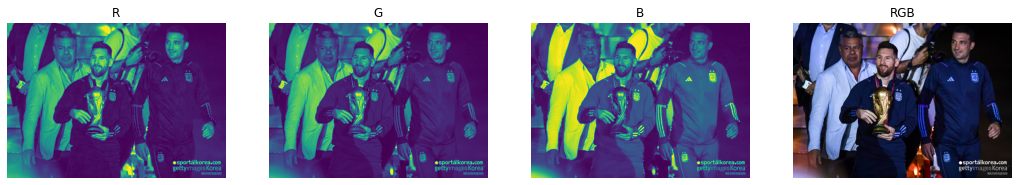

In [13]:
fig, axes = plt.subplots(1, 4, figsize=(18, 9))
for i, (ax, t) in enumerate(zip(axes, ["R", "G", "B", "RGB"])):
    if i == 3:
        ax.imshow(img_array)
        ax.axis("off")
        ax.set_title(t)
    else:
        ax.imshow(img_array[:, :, i])
        ax.axis("off")
        ax.set_title(t)